# Country Classification for HELP International

The <b> Help International </b> is an NGO that focused in reducing poverty. In this case, Help International already fundraised USD 10 million and wants to donate it to some countries.

## Objective

* To give recommendation to Help International regarding which countries are eligible to get the donation (with total USD 10 million).
* There is a **specific criteria** that should be fulfilled, it should be indicated by **the country's health and socioeconomic**.

## Library

In [31]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##DataFrame

In [45]:
# Read the data

df = pd.read_csv('Country_List (HELP).csv')
df.head()

,Country,Child Mortality,Export,Health Cost,Import,Income Per Capita,Inflation,Life Expectancy,Fertility Rate,GDP Per Capita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [46]:
# Review the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            167 non-null    object 
 1   Child Mortality    167 non-null    float64
 2   Export             167 non-null    float64
 3   Health Cost        167 non-null    float64
 4   Import             167 non-null    float64
 5   Income Per Capita  167 non-null    int64  
 6   Inflation          167 non-null    float64
 7   Life Expectancy    167 non-null    float64
 8   Fertility Rate     167 non-null    float64
 9   GDP Per Capita     167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


*   There are 10 columns and 167 rows of data.
*   There are 167 non-null values from each rows.
*   There is 1 object column, 7 float columns, and 2 integer columns, which means most of the data presented in number.


In [34]:
# Check null values in the dataframe

df.isnull().sum()

Country              0
Child Mortality      0
Export               0
Health Cost          0
Import               0
Income Per Capita    0
Inflation            0
Life Expectancy      0
Fertility Rate       0
GDP Per Capita       0
dtype: int64

There is no null values.

Categorize columns to the specific criteria:
* health: Health cost, child mortality, fertility rate, and life expectancy.
* socioeconomic: GDP per capita, income per capita, import, export, and inflation.

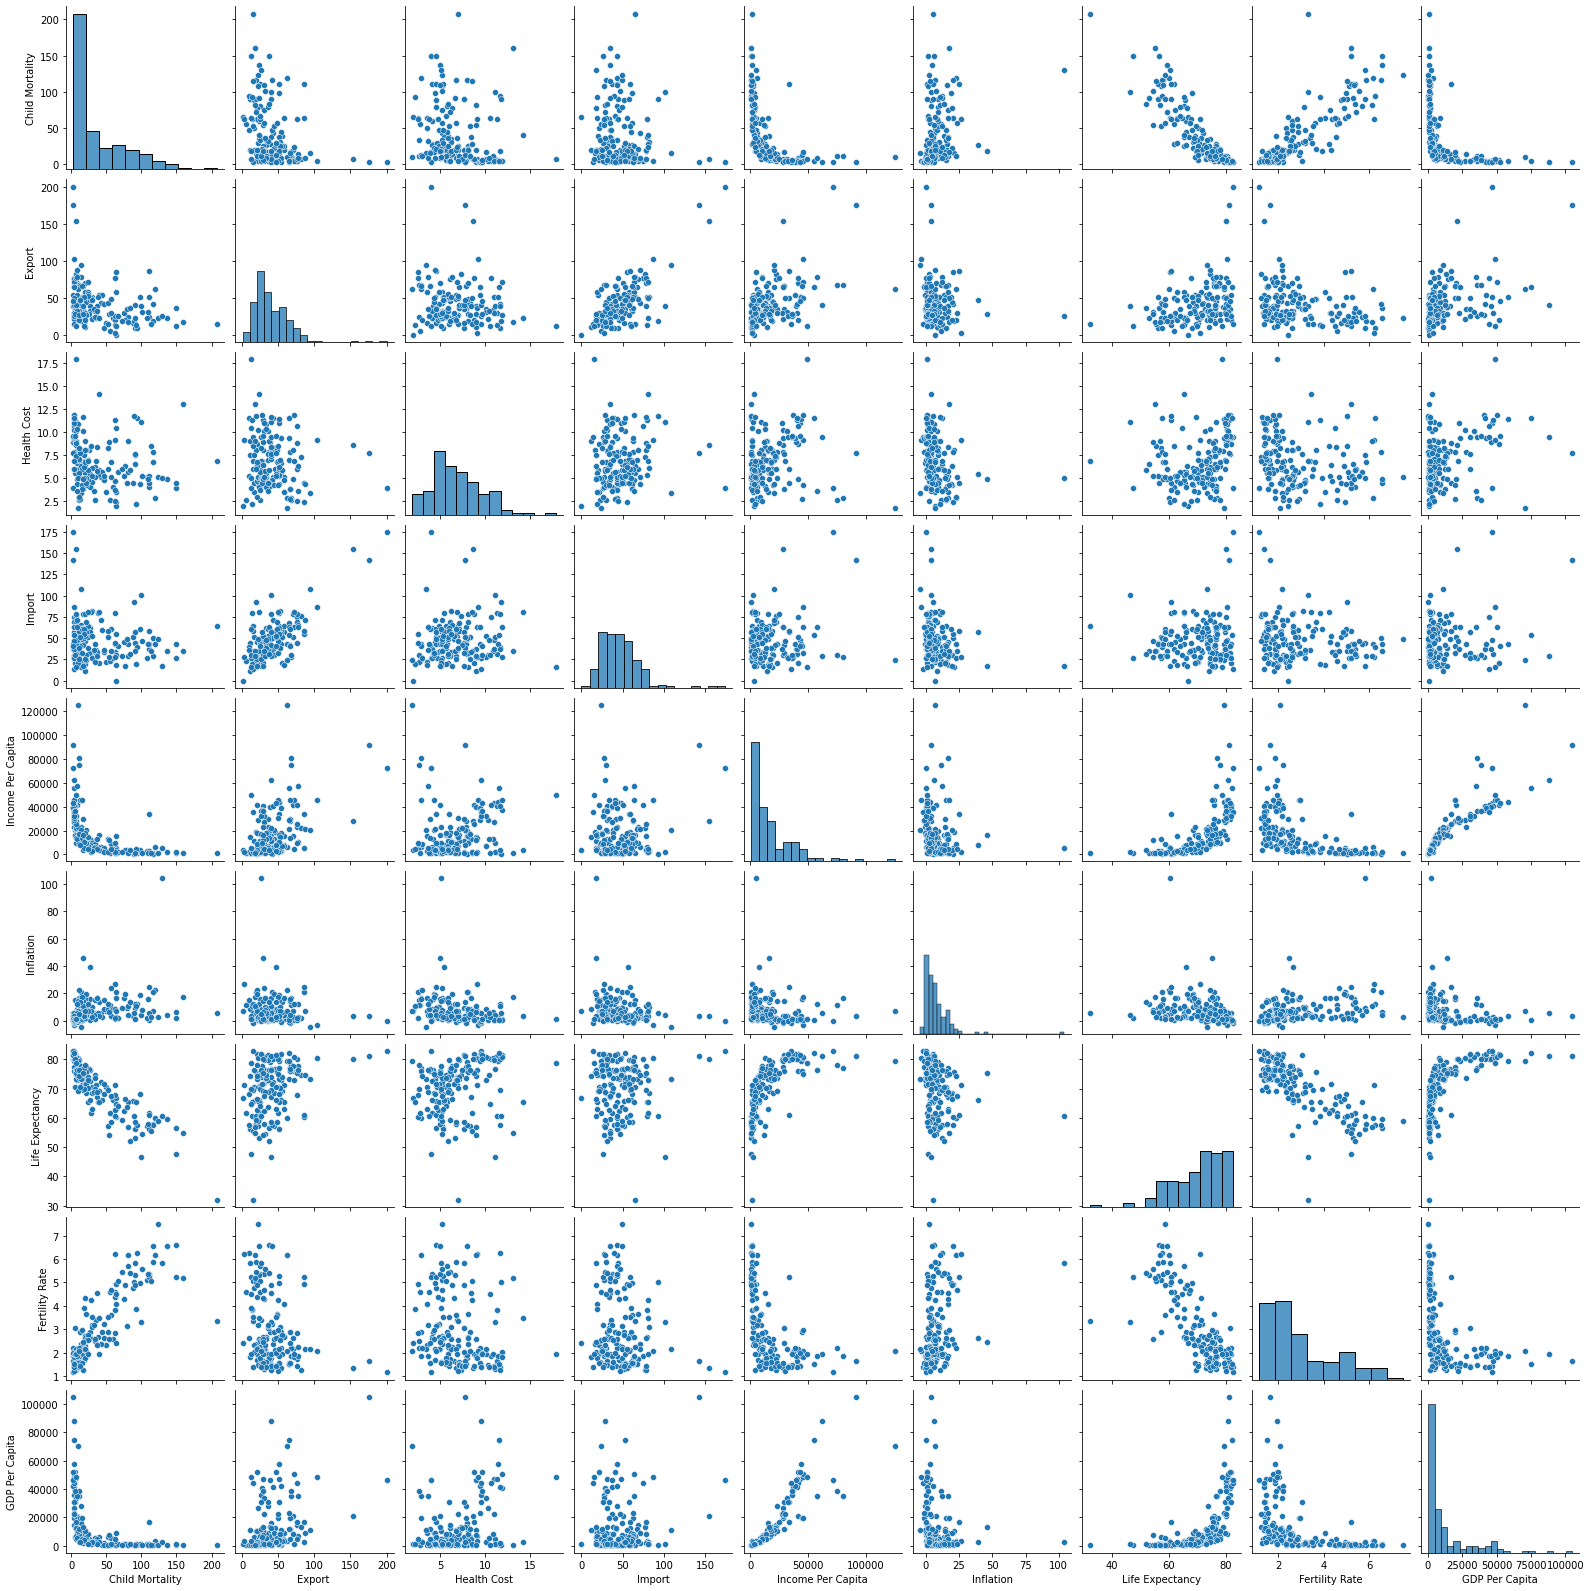

In [35]:
# To see whether there is a correlation among features, especially between health and socioeconomic

sns.pairplot(df)

From the pairplot there is a correlation among these features:
* Socioeconomic: `GDP Percapita` and `Inflation`.
* Health: `Fertility rate`, `Life Expectancy`, and `Child Mortality`.

##Parameter & Outliers

From the pairplot before there are 5 features that are correlated negatively. Because `GDP Percapita` is more reliable in economic index rather than just an `inflation`. <br>
Furthermore, if we look at the `Health` features, it is already concluded that when `GDP increase`, the `Fertility rate` decrease, `Life Expectancy` increase, and `Child Mortality` decrease. **BUT** if we look at the `Health Cost`, the data is more spread.
* Socioeconomic: `GDP Percapita`
* Health: `Health Cost`

In [75]:
# Choose 2 features for parameter in deciding the country eligibility

df_GDP_Health = df[['Country', 'GDP Per Capita', 'Health Cost']]
df_GDP_Health

,Country,GDP Per Capita,Health Cost
0,Afghanistan,553,7.58
1,Albania,4090,6.55
2,Algeria,4460,4.17
3,Angola,3530,2.85
4,Antigua and Barbuda,12200,6.03
...,...,...,...
162,Vanuatu,2970,5.25
163,Venezuela,13500,4.91
164,Vietnam,1310,6.84
165,Yemen,1310,5.18


In [76]:
# To see which countries have the highest GDP percapita

display(df_GDP_Health.sort_values('GDP Per Capita', ascending=False))

,Country,GDP Per Capita,Health Cost
91,Luxembourg,105000,7.77
114,Norway,87800,9.48
145,Switzerland,74600,11.50
123,Qatar,70300,1.81
44,Denmark,58000,11.40
...,...,...,...
132,Sierra Leone,399,13.10
112,Niger,348,5.16
37,"Congo, Dem. Rep.",334,7.91
88,Liberia,327,11.80


Top 5 highest `GDP Percapita` are those countries classified as developed countries (Luxebourg, Norway, Switzerland, Qatar, and Denmark). While the 5 lowest are the third world countries (Sierra Leone, Nigeria, Congo, Dem. Rep., Liberia, and Burundi).

In [50]:
# To see which countries have the highest cost of health

display(df_GDP_Health.sort_values('Health Cost', ascending=False))

,Country,GDP Per Capita,Health Cost
159,United States,48400,17.90
101,"Micronesia, Fed. Sts.",2860,14.20
132,Sierra Leone,399,13.10
110,Netherlands,50300,11.90
54,France,40600,11.90
...,...,...,...
154,Turkmenistan,4440,2.50
38,"Congo, Rep.",2740,2.46
116,Pakistan,1040,2.20
107,Myanmar,988,1.97


The countries by `health cost` is more variative. <br>
The top 5 countries with highest `health cost` are:
* United States, Netherlands, and France which are developed countries, 
* while Micronesia, Fed.Sts. and Sierra Leone are considered least developed countries. <br>
Same goes with top 5 countries with lowest `health cost`, there areL
* Qatar as a developed country.
* Turkmenistan as a developing country.
* Myanmar, Congo, Rep., Pakistan as least developed country.

###Outliers

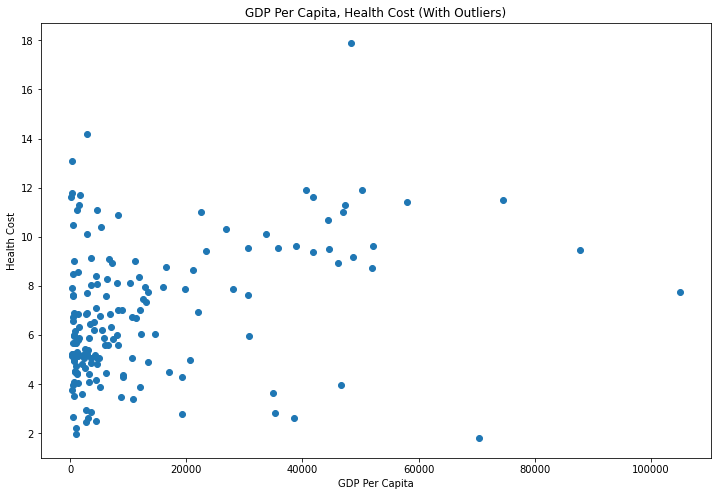

In [77]:
# to see the relation between 2 parameters (GDP and Health cost)

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter('GDP Per Capita','Health Cost', data=df_GDP_Health)
plt. title('GDP Per Capita, Health Cost (With Outliers)')
plt.xlabel('GDP Per Capita')
plt.ylabel('Health Cost')
plt.show()

There are some data that out of range of others data (around > 40000).

In [78]:
# Look for outliers from the latest dataset

Q1 = df_GDP_Health['GDP Per Capita'].quantile(0.25)
Q3 = df_GDP_Health['GDP Per Capita'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)


12720.0


In [79]:
# Replace outliers to Q1 & Q3

df_GDP_Health.loc[df_GDP_Health['GDP Per Capita'] < (Q1-IQR*1.5), 'GDP Per Capita'] = Q1
df_GDP_Health.loc[df_GDP_Health['GDP Per Capita'] > (Q3+IQR*1.5), 'GDP Per Capita'] = Q3

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


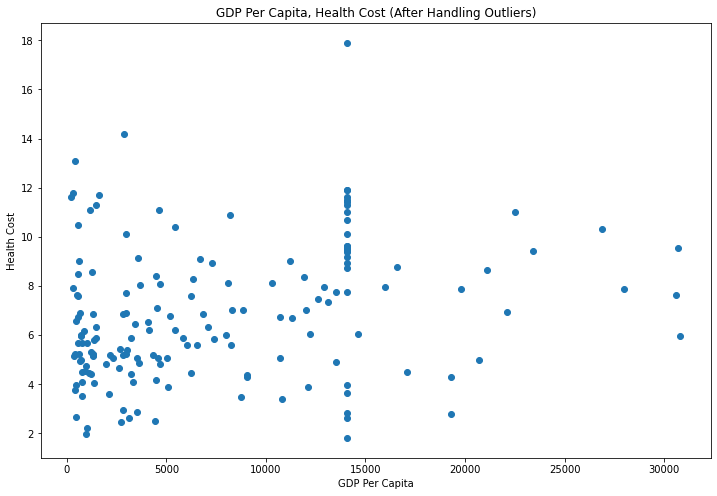

In [80]:
# Visualize scatterplot without outliers

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter('GDP Per Capita','Health Cost', data=df_GDP_Health)
plt.title('GDP Per Capita, Health Cost (After Handling Outliers)')
plt.xlabel('GDP Per Capita')
plt.ylabel('Health Cost')
plt.show()

The outliers are already changed to the Q1 & Q3. It could be seen from the range of the graph 0-30000.

In [52]:
display(df_GDP_Health.sort_values('Health Cost', ascending=False))

,Country,GDP Per Capita,Health Cost
159,United States,48400,17.90
101,"Micronesia, Fed. Sts.",2860,14.20
132,Sierra Leone,399,13.10
110,Netherlands,50300,11.90
54,France,40600,11.90
...,...,...,...
154,Turkmenistan,4440,2.50
38,"Congo, Rep.",2740,2.46
116,Pakistan,1040,2.20
107,Myanmar,988,1.97


## Modelling with KMeans Clustering

As the relation between `GDP Percapita` and `Health Cost` is more variative and there is no specific pattern, it is better to classify it into a specific cluster.

###Elbow Method

Text(0, 0.5, 'WCSS')

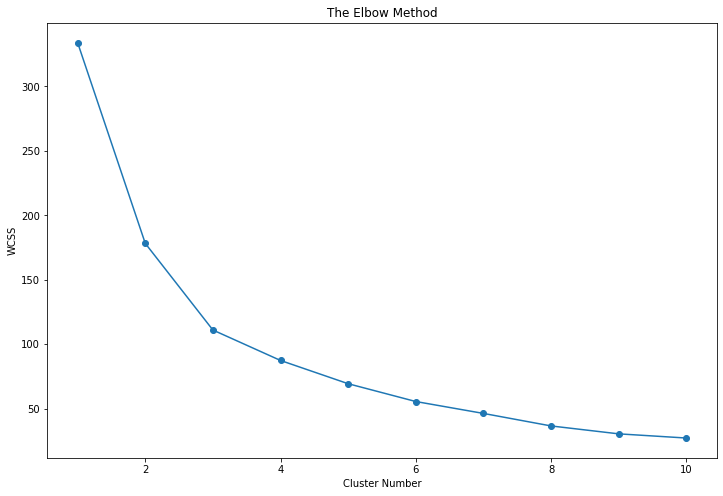

In [53]:
# Scale
from sklearn.preprocessing import StandardScaler

df_scale = df_GDP_Health[['GDP Per Capita', 'Health Cost']]
sc = StandardScaler()
df_scale_fit = sc.fit_transform(df_scale)
new_df = pd.DataFrame(data=df_scale_fit, columns = ['GDP Per Capita', 'Health Cost'])

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for x in range (1,11):
  kmeans = KMeans(n_clusters = x, init='k-means++', random_state=42)
  kmeans.fit(new_df)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,8))
plt.plot(range(1,11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Cluster Number')
plt.ylabel('WCSS')



With consideration that the degree created after number 4 is already an obtuse angle and there is no significant difference afterwards. <br>**The cluster number is 4**.

###KMeans

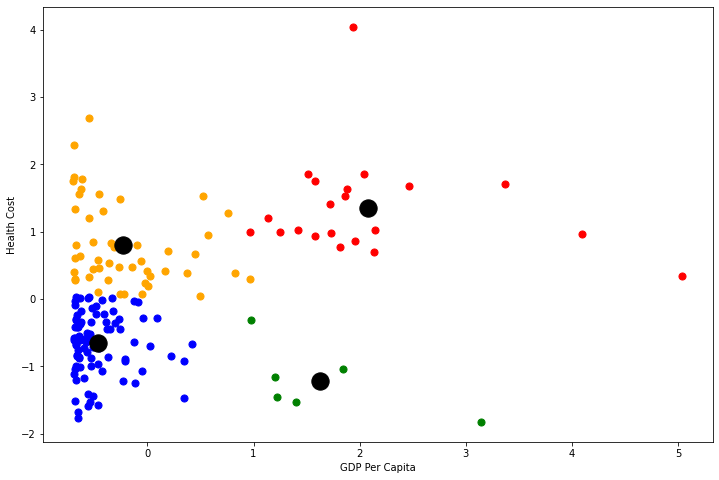

In [59]:
# KMeans

k_means = KMeans(n_clusters = 4, init = 'k-means++', random_state=42).fit(df_scale_fit)
label1 = k_means.labels_

new_df['label_km'] = label1

# 'GDP Per Capita', 'Health Cost'
plt.figure(figsize=(12,8))
plt.scatter(new_df['GDP Per Capita'][new_df.label_km == 0], new_df['Health Cost'][new_df.label_km == 0], c='orange', s=50)
plt.scatter(new_df['GDP Per Capita'][new_df.label_km == 1], new_df['Health Cost'][new_df.label_km == 1], c='red', s=50)
plt.scatter(new_df['GDP Per Capita'][new_df.label_km == 2], new_df['Health Cost'][new_df.label_km == 2], c='green', s=50)
plt.scatter(new_df['GDP Per Capita'][new_df.label_km == 3], new_df['Health Cost'][new_df.label_km == 3], c='blue', s=50)

centers = k_means.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=300)
plt.xlabel('GDP Per Capita')
plt.ylabel('Health Cost')
plt.show()

The data has been classified into 4 clusters (yellow, red, blue, and green). **BUT** the range of data is not clear enough to tell how much is the `GDP Percapita` nor the `Health Cost`.

###Reverse Scaling

In [60]:
# Reverse scaling to bring back the real value of GDP and Health Cost

df_scale_r = df_GDP_Health[['GDP Per Capita', 'Health Cost']]
sc = StandardScaler()
df_scale_rf = sc.fit_transform(df_scale_r)
new_df_r = pd.DataFrame(data=df_scale_rf, columns = ['GDP Per Capita', 'Health Cost'])
new_df_r

df_scale_inv = sc.inverse_transform(new_df_r)
df_GDP_final = pd.DataFrame(data=df_scale_inv, columns = ['GDP Per Capita', 'Health Cost'])

df_GDP_final

,GDP Per Capita,Health Cost
0,553.0,7.58
1,4090.0,6.55
2,4460.0,4.17
3,3530.0,2.85
4,12200.0,6.03
...,...,...
162,2970.0,5.25
163,13500.0,4.91
164,1310.0,6.84
165,1310.0,5.18


The values of `GDP Percapita` and the`Health Cost` already rescaled. Now the center of each clusters need to be resclaed, too.

In [61]:
# Centers after Clustering

centers

array([[-0.22485323,  0.79745211],
       [ 2.07779935,  1.34793426],
       [ 1.6299802 , -1.21863506],
       [-0.46588856, -0.66010948]])

In [62]:
# Rescaling the centers

centroid_fit = sc.inverse_transform(centers)
centroid_fit

array([[8.85524490e+03, 8.99959184e+00],
       [5.09333333e+04, 1.05071429e+01],
       [4.27500000e+04, 3.47833333e+00],
       [4.45062637e+03, 5.00791209e+00]])

The centers are already rescaled to fit to the rescaled values of `GDP Percapita` and the `Health Cost`.

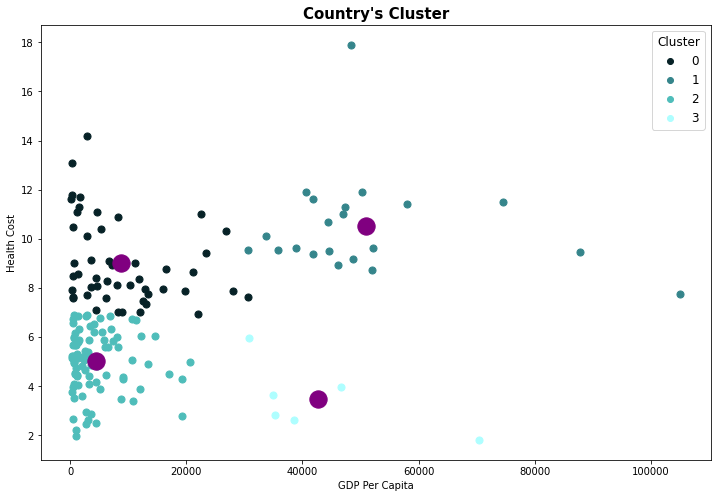

In [63]:
from sklearn.cluster import KMeans

k_means2 = KMeans(n_clusters = 4, init = 'k-means++', random_state=42).fit(new_df_r)
lab2 = k_means2.labels_

df_GDP_final['Cluster'] = lab2

plt.figure(figsize=(12,8))
colorDict = {0: '#072227', 1: '#35858B', 2: '#4FBDBA', 3: '#AEFEFF'}
markers = [plt.Line2D([0,0],[0,0], color=color, marker='o', linestyle='') for color in colorDict.values()]
plt.scatter(df_GDP_final['GDP Per Capita'][df_GDP_final.Cluster == 0], df_GDP_final['Health Cost'][df_GDP_final.Cluster == 0], c = '#072227', s=50)
plt.scatter(df_GDP_final['GDP Per Capita'][df_GDP_final.Cluster == 1], df_GDP_final['Health Cost'][df_GDP_final.Cluster == 1], c = '#35858B', s=50)
plt.scatter(df_GDP_final['GDP Per Capita'][df_GDP_final.Cluster == 2], df_GDP_final['Health Cost'][df_GDP_final.Cluster == 2], c = '#AEFEFF', s=50)
plt.scatter(df_GDP_final['GDP Per Capita'][df_GDP_final.Cluster == 3], df_GDP_final['Health Cost'][df_GDP_final.Cluster == 3], c = '#4FBDBA', s=50)


center_final = centroid_fit
plt.scatter(center_final[:,0], center_final[:,1], c='purple', s=300)
plt.xlabel('GDP Per Capita')
plt.ylabel('Health Cost')
plt.title("Country's Cluster", fontsize=15, weight='bold')
plt.legend(markers, list(colorDict.keys())[:4], prop={'size':12}, title='Cluster', title_fontsize=12)
plt.show()

The final result of the clustering, there are 4 clusters of country, there are:

* Cluster 0: `GDP Per capita` < 10000 & `Health Cost` > 8.
* Cluster 1: `GDP Per capita` < 10000 & `Health Cost` < 8.
* Cluster 2: `GDP Per capita` > 10000 & `Health Cost` > 8.
* Cluster 3: `GDP Per capita` > 10000 & `Health Cost` < 8.

From that, we can see that:
* Cluster 0 is Low GDP, High Health Cost.
* Cluster 1 is Low GDP, Low Health Cost.
* Cluster 2 is High GDP, High Health Cost.
* Cluster 3 is High GDP, Low Health Cost.


In [64]:
df_GDP_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GDP Per Capita  167 non-null    float64
 1   Health Cost     167 non-null    float64
 2   Cluster         167 non-null    int32  
dtypes: float64(2), int32(1)
memory usage: 3.4 KB


##Ratio

From the clustering result,  the cluster with Low GDP and High Health Cost is already identified. Furthermore, how to decide which countries to be given the financial support? <br>
To see the comparison between `GDP Per capita` and `Health Cost`, a new parameter is used, **Ratio**. It is calculated by dividing the `Health Cost` to `GDP Per capita`. <br>

In [69]:
# Checking cluster

cluster_zero = df_GDP_final.loc[df_GDP_final.Cluster == 0]
cluster_zero.shape

(49, 3)

The cluster is already split, but it still lack all the country's names. All dataframe from all clusters should be merged and including the country's name.

In [66]:
# Join table & create ratio column

df_final_ratio = pd.merge(df_GDP_final, df_GDP_Health, left_index=True, right_index=True)

# Drop duplicated column
df_final_ratio.drop(columns=['Health Cost_y', 'GDP Per Capita_y'], axis=1, inplace=True)

# Rename column
df_final_ratio.rename(columns={'Health Cost_x' : 'Health Cost', 'GDP Per Capita_x' : 'GDP Per Capita'}, inplace=True)

# Create ratio column
df_final_ratio['Ratio'] = (df_final_ratio['Health Cost']/df_final_ratio['GDP Per Capita'])*100

# Rearrange column position
df_final_ratio = df_final_ratio[['Country', 'GDP Per Capita',	'Health Cost',	'Cluster',	'Ratio']]


df_final_ratio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         167 non-null    object 
 1   GDP Per Capita  167 non-null    float64
 2   Health Cost     167 non-null    float64
 3   Cluster         167 non-null    int32  
 4   Ratio           167 non-null    float64
dtypes: float64(3), int32(1), object(1)
memory usage: 6.0+ KB


In [74]:
df_final_ratio.head()

,Country,GDP Per Capita,Health Cost,Cluster,Ratio
0,Afghanistan,553.0,7.58,0,1.370705
1,Albania,4090.0,6.55,3,0.160147
2,Algeria,4460.0,4.17,3,0.093498
3,Angola,3530.0,2.85,3,0.080737
4,Antigua and Barbuda,12200.0,6.03,3,0.049426


The final dataframe already included all countries in 4 clusters including their names. The total data is the same as per original dataframe.

In [71]:
# Check Cluster 0 in the final dataframe

cluster_0 = df_final_ratio.loc[df_final_ratio.Cluster == 0]
cluster_0.shape

(49, 5)

The total data in cluster 0 is still the same as from the clustered dataframe (before merged with all clusters).

In [72]:
# Checking the countries in cluster 0 from the highest ratio

cluster_0.sort_values('Ratio', ascending=False)

,Country,GDP Per Capita,Health Cost,Cluster,Ratio
26,Burundi,231.0,11.60,0,5.021645
88,Liberia,327.0,11.80,0,3.608563
132,Sierra Leone,399.0,13.10,0,3.283208
37,"Congo, Dem. Rep.",334.0,7.91,0,2.368263
126,Rwanda,563.0,10.50,0,1.865009
150,Togo,488.0,7.65,0,1.567623
64,Guinea-Bissau,547.0,8.50,0,1.553931
155,Uganda,595.0,9.01,0,1.514286
0,Afghanistan,553.0,7.58,0,1.370705
87,Lesotho,1170.0,11.10,0,0.948718


## Conclusion & Recommendation

There are 4 countries with `Ratio` more than 2, those are: **Burundi, Liberia, Sierra Leone**, and **Congo, Dem. Rep.** It is recommended for the HELP International to give financial support for those countries.

## Additional Exploration

In [68]:
# Clusters for Countries in ASEAN

ASEAN = ('Brunei', 'Cambodia', 'Indonesia', 'Lao', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam')
df_final_ratio.loc[df_final_ratio['Country'].isin(ASEAN)]

,Country,GDP Per Capita,Health Cost,Cluster,Ratio
23,Brunei,35300.0,2.84,2,0.008045
27,Cambodia,786.0,5.68,3,0.722646
70,Indonesia,3110.0,2.61,3,0.083923
84,Lao,1140.0,4.47,3,0.392105
95,Malaysia,9070.0,4.39,3,0.048401
107,Myanmar,988.0,1.97,3,0.199393
120,Philippines,2130.0,3.61,3,0.169484
133,Singapore,46600.0,3.96,2,0.008498
148,Thailand,5080.0,3.88,3,0.076378
164,Vietnam,1310.0,6.84,3,0.522137


**Insight:** <br>
* All countries have `Ratio` less than 1, which means the `GDP Per capita` and the `Health Cost` is not unbalanced.
* From all ASEAN countries, only Brunei Darussalam and Singapore that are considered **High GDP and High Health Cost**.
* While the rest 8 countries in ASEAN have **High GDP, with Low Health Cost**. Furthermore, from those 8 countries, there are Malaysia, Thailand, and Indonesia with top 3 lowest `Ratio`. 
